In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
import scipy.stats as stats
from datetime import datetime
import os
from scipy.optimize import fmin

In [2]:
%run Algorithms220125.ipynb

In [38]:
##Main simulation
# Linear reward

#number of actions
N=2 

#dimension of context.
d=4

#total number of decision points 
T=50  

# standard deviation of error
R=0.01

#coefficients

coef=np.array([-1,1,1,0])
coef=coef/np.sqrt(coef.dot(coef))

#hyperparameter

v=0.001
epsilon=0.01

cumulated_reward_AC=[]
cumulated_reward_Prop=[]
cumulated_reward_epsilon=[]
theta_estimate_AC=[]
theta_estimate_Prop=[]
mu_estimate_epsilon=[]
variance_estimate_AC=[]
variance_estimate_Prop=[]
variance_estimate_epsilon=[]

In [39]:
stepsize=10

In [40]:
for simul in range(100):
    

    RWD3=[]
    RWD4=[]
    RWD5=[]
    optRWD=[]
        

    M3=ActorCritic_fast(d=d,N=N,v=v,tc=True)
    M4=Prop_fast(d=d,N=N,v=v,tc=False,stepsize=stepsize)
    M5=Epsilon_greedy(d=2*d,N=N,epsilon=epsilon)
        
    for t in range(T):
                        
        err=R*np.random.randn()
            
        Bs=[]
        b=[]
        for i in range(N):
            bi=np.random.multivariate_normal(np.zeros(d),np.eye(d))
            bi=bi/np.sqrt(bi.dot(bi))
            b=b+list(bi)
            Bs.append(bi)
    

        a=M3.select_ac(Bs)
        rwd=np.dot(Bs[a],coef)-np.amax(np.dot(Bs,coef))+err
        M3.update1(rwd)
        if M3.t%stepsize==0:
            M3.update2()
        RWD3.append(rwd)
        
        a=M4.select_ac(Bs)
        rwd=np.dot(Bs[a],coef)-np.amax(np.dot(Bs,coef))+err
        M4.update1_1(rwd)
        if M4.t%stepsize==0:
            M4.update1_2()
            M4.update2()
        RWD4.append(rwd)
        
        a=M5.select_ac(b)
        rwd=np.dot(Bs[a],coef)-np.amax(np.dot(Bs,coef))+err
        M5.update(rwd)
        RWD5.append(rwd)
        
        
    print(simul)
        

    cum_sum3=np.array(np.cumsum(RWD3,axis=0))
    cum_sum4=np.array(np.cumsum(RWD4,axis=0))
    cum_sum5=np.array(np.cumsum(RWD5,axis=0))
    

    cumulated_reward_AC.append(cum_sum3)
    cumulated_reward_Prop.append(cum_sum4)
    cumulated_reward_epsilon.append(cum_sum5)
    
    theta_estimate_AC.append(M3.theta)
    theta_estimate_Prop.append(M4.theta)
    mu_estimate_epsilon.append(M5.mu_hat)
    variance_estimate_AC.append(M3.variance())
    variance_estimate_Prop.append(M4.variance())
    variance_estimate_epsilon.append(M5.variance())

Optimization terminated successfully.
         Current function value: 0.127163
         Iterations: 217
         Function evaluations: 363
Optimization terminated successfully.
         Current function value: -0.178534
         Iterations: 112
         Function evaluations: 205
Optimization terminated successfully.
         Current function value: 0.129790
         Iterations: 213
         Function evaluations: 362
Optimization terminated successfully.
         Current function value: -0.142371
         Iterations: 221
         Function evaluations: 363
Optimization terminated successfully.
         Current function value: 0.118904
         Iterations: 123
         Function evaluations: 209
Optimization terminated successfully.
         Current function value: -0.152018
         Iterations: 160
         Function evaluations: 263
Optimization terminated successfully.
         Current function value: 0.106400
         Iterations: 110
         Function evaluations: 193
Optimization term

Optimization terminated successfully.
         Current function value: -0.181676
         Iterations: 240
         Function evaluations: 406
5
Optimization terminated successfully.
         Current function value: 0.295002
         Iterations: 85
         Function evaluations: 151
Optimization terminated successfully.
         Current function value: -0.365851
         Iterations: 127
         Function evaluations: 216
Optimization terminated successfully.
         Current function value: 0.180935
         Iterations: 233
         Function evaluations: 385
Optimization terminated successfully.
         Current function value: -0.210693
         Iterations: 109
         Function evaluations: 192
Optimization terminated successfully.
         Current function value: 0.181258
         Iterations: 223
         Function evaluations: 380
Optimization terminated successfully.
         Current function value: -0.275617
         Iterations: 234
         Function evaluations: 384
Optimization te

Optimization terminated successfully.
         Current function value: 0.124595
         Iterations: 126
         Function evaluations: 217
Optimization terminated successfully.
         Current function value: -0.293355
         Iterations: 128
         Function evaluations: 223
11
Optimization terminated successfully.
         Current function value: 0.142324
         Iterations: 213
         Function evaluations: 357
Optimization terminated successfully.
         Current function value: -0.270691
         Iterations: 109
         Function evaluations: 186
Optimization terminated successfully.
         Current function value: 0.180608
         Iterations: 118
         Function evaluations: 201
Optimization terminated successfully.
         Current function value: -0.142388
         Iterations: 107
         Function evaluations: 191
Optimization terminated successfully.
         Current function value: 0.137243
         Iterations: 136
         Function evaluations: 232
Optimization t

Optimization terminated successfully.
         Current function value: 0.101643
         Iterations: 140
         Function evaluations: 243
Optimization terminated successfully.
         Current function value: -0.222488
         Iterations: 112
         Function evaluations: 197
17
Optimization terminated successfully.
         Current function value: 0.156275
         Iterations: 230
         Function evaluations: 396
Optimization terminated successfully.
         Current function value: -0.393774
         Iterations: 107
         Function evaluations: 181
Optimization terminated successfully.
         Current function value: 0.127862
         Iterations: 136
         Function evaluations: 237
Optimization terminated successfully.
         Current function value: -0.195191
         Iterations: 120
         Function evaluations: 204
Optimization terminated successfully.
         Current function value: 0.130812
         Iterations: 262
         Function evaluations: 434
Optimization t

Optimization terminated successfully.
         Current function value: -0.336902
         Iterations: 247
         Function evaluations: 410
Optimization terminated successfully.
         Current function value: 0.099954
         Iterations: 148
         Function evaluations: 250
Optimization terminated successfully.
         Current function value: -0.301730
         Iterations: 126
         Function evaluations: 210
23
Optimization terminated successfully.
         Current function value: 0.062205
         Iterations: 109
         Function evaluations: 186
Optimization terminated successfully.
         Current function value: -0.056251
         Iterations: 220
         Function evaluations: 378
Optimization terminated successfully.
         Current function value: 0.090660
         Iterations: 374
         Function evaluations: 632
Optimization terminated successfully.
         Current function value: -0.235579
         Iterations: 112
         Function evaluations: 188
Optimization 

Optimization terminated successfully.
         Current function value: 0.120263
         Iterations: 140
         Function evaluations: 231
Optimization terminated successfully.
         Current function value: -0.314794
         Iterations: 99
         Function evaluations: 180
Optimization terminated successfully.
         Current function value: 0.112510
         Iterations: 222
         Function evaluations: 386
Optimization terminated successfully.
         Current function value: -0.289240
         Iterations: 121
         Function evaluations: 212
29
Optimization terminated successfully.
         Current function value: 0.130200
         Iterations: 132
         Function evaluations: 221
Optimization terminated successfully.
         Current function value: -0.554015
         Iterations: 102
         Function evaluations: 173
Optimization terminated successfully.
         Current function value: 0.118079
         Iterations: 238
         Function evaluations: 389
Optimization te

Optimization terminated successfully.
         Current function value: 0.133672
         Iterations: 119
         Function evaluations: 206
Optimization terminated successfully.
         Current function value: -0.190585
         Iterations: 135
         Function evaluations: 235
Optimization terminated successfully.
         Current function value: 0.125595
         Iterations: 139
         Function evaluations: 234
Optimization terminated successfully.
         Current function value: -0.205692
         Iterations: 122
         Function evaluations: 213
35
Optimization terminated successfully.
         Current function value: 0.239890
         Iterations: 140
         Function evaluations: 236
Optimization terminated successfully.
         Current function value: -0.244637
         Iterations: 154
         Function evaluations: 266
Optimization terminated successfully.
         Current function value: 0.236315
         Iterations: 328
         Function evaluations: 549
Optimization t

Optimization terminated successfully.
         Current function value: -0.348023
         Iterations: 270
         Function evaluations: 449
Optimization terminated successfully.
         Current function value: 0.095520
         Iterations: 234
         Function evaluations: 404
Optimization terminated successfully.
         Current function value: -0.350392
         Iterations: 103
         Function evaluations: 176
Optimization terminated successfully.
         Current function value: 0.090078
         Iterations: 217
         Function evaluations: 365
Optimization terminated successfully.
         Current function value: -0.305686
         Iterations: 217
         Function evaluations: 365
41
Optimization terminated successfully.
         Current function value: 0.177991
         Iterations: 194
         Function evaluations: 329
Optimization terminated successfully.
         Current function value: -0.126060
         Iterations: 105
         Function evaluations: 185
Optimization 

Optimization terminated successfully.
         Current function value: 0.107044
         Iterations: 199
         Function evaluations: 341
Optimization terminated successfully.
         Current function value: -0.159195
         Iterations: 259
         Function evaluations: 432
Optimization terminated successfully.
         Current function value: 0.110758
         Iterations: 145
         Function evaluations: 246
Optimization terminated successfully.
         Current function value: -0.196333
         Iterations: 207
         Function evaluations: 356
Optimization terminated successfully.
         Current function value: 0.121997
         Iterations: 179
         Function evaluations: 300
Optimization terminated successfully.
         Current function value: -0.228693
         Iterations: 110
         Function evaluations: 188
47
Optimization terminated successfully.
         Current function value: 0.076253
         Iterations: 126
         Function evaluations: 217
Optimization t

Optimization terminated successfully.
         Current function value: -0.142194
         Iterations: 257
         Function evaluations: 434
Optimization terminated successfully.
         Current function value: 0.159340
         Iterations: 122
         Function evaluations: 209
Optimization terminated successfully.
         Current function value: -0.120938
         Iterations: 116
         Function evaluations: 200
Optimization terminated successfully.
         Current function value: 0.132658
         Iterations: 102
         Function evaluations: 181
Optimization terminated successfully.
         Current function value: -0.136668
         Iterations: 113
         Function evaluations: 197
Optimization terminated successfully.
         Current function value: 0.133261
         Iterations: 134
         Function evaluations: 224
Optimization terminated successfully.
         Current function value: -0.155972
         Iterations: 267
         Function evaluations: 449
53
Optimization 

Optimization terminated successfully.
         Current function value: 0.087151
         Iterations: 239
         Function evaluations: 396
Optimization terminated successfully.
         Current function value: -0.178655
         Iterations: 102
         Function evaluations: 178
Optimization terminated successfully.
         Current function value: 0.077523
         Iterations: 143
         Function evaluations: 240
Optimization terminated successfully.
         Current function value: -0.205708
         Iterations: 243
         Function evaluations: 403
Optimization terminated successfully.
         Current function value: 0.076558
         Iterations: 110
         Function evaluations: 194
Optimization terminated successfully.
         Current function value: -0.158583
         Iterations: 156
         Function evaluations: 262
Optimization terminated successfully.
         Current function value: 0.065359
         Iterations: 337
         Function evaluations: 562
Optimization term

Optimization terminated successfully.
         Current function value: -0.084578
         Iterations: 139
         Function evaluations: 245
Optimization terminated successfully.
         Current function value: 0.107834
         Iterations: 124
         Function evaluations: 210
Optimization terminated successfully.
         Current function value: -0.290336
         Iterations: 242
         Function evaluations: 407
Optimization terminated successfully.
         Current function value: 0.084579
         Iterations: 340
         Function evaluations: 566
Optimization terminated successfully.
         Current function value: -0.236629
         Iterations: 194
         Function evaluations: 323
Optimization terminated successfully.
         Current function value: 0.070291
         Iterations: 237
         Function evaluations: 399
Optimization terminated successfully.
         Current function value: -0.214262
         Iterations: 216
         Function evaluations: 361
Optimization ter

Optimization terminated successfully.
         Current function value: -0.388297
         Iterations: 349
         Function evaluations: 586
Optimization terminated successfully.
         Current function value: 0.120294
         Iterations: 114
         Function evaluations: 198
Optimization terminated successfully.
         Current function value: -0.225073
         Iterations: 124
         Function evaluations: 214
Optimization terminated successfully.
         Current function value: 0.113713
         Iterations: 242
         Function evaluations: 401
Optimization terminated successfully.
         Current function value: -0.209213
         Iterations: 224
         Function evaluations: 383
Optimization terminated successfully.
         Current function value: 0.109809
         Iterations: 165
         Function evaluations: 280
Optimization terminated successfully.
         Current function value: -0.191068
         Iterations: 355
         Function evaluations: 590
Optimization ter

Optimization terminated successfully.
         Current function value: -0.187055
         Iterations: 140
         Function evaluations: 232
Optimization terminated successfully.
         Current function value: 0.050515
         Iterations: 234
         Function evaluations: 399
Optimization terminated successfully.
         Current function value: -0.180161
         Iterations: 92
         Function evaluations: 164
Optimization terminated successfully.
         Current function value: 0.067182
         Iterations: 134
         Function evaluations: 227
Optimization terminated successfully.
         Current function value: -0.120900
         Iterations: 113
         Function evaluations: 202
Optimization terminated successfully.
         Current function value: 0.067754
         Iterations: 146
         Function evaluations: 254
Optimization terminated successfully.
         Current function value: -0.156992
         Iterations: 109
         Function evaluations: 193
Optimization term

Optimization terminated successfully.
         Current function value: 0.112707
         Iterations: 214
         Function evaluations: 365
Optimization terminated successfully.
         Current function value: -0.207285
         Iterations: 120
         Function evaluations: 206
88
Optimization terminated successfully.
         Current function value: 0.220216
         Iterations: 134
         Function evaluations: 224
Optimization terminated successfully.
         Current function value: -0.284290
         Iterations: 124
         Function evaluations: 214
Optimization terminated successfully.
         Current function value: 0.132763
         Iterations: 291
         Function evaluations: 489
Optimization terminated successfully.
         Current function value: -0.257343
         Iterations: 122
         Function evaluations: 216
Optimization terminated successfully.
         Current function value: 0.125191
         Iterations: 120
         Function evaluations: 208
Optimization t

Optimization terminated successfully.
         Current function value: 0.126449
         Iterations: 113
         Function evaluations: 192
Optimization terminated successfully.
         Current function value: -0.156382
         Iterations: 108
         Function evaluations: 182
94
Optimization terminated successfully.
         Current function value: 0.239701
         Iterations: 136
         Function evaluations: 236
Optimization terminated successfully.
         Current function value: -0.068244
         Iterations: 133
         Function evaluations: 233
Optimization terminated successfully.
         Current function value: 0.215636
         Iterations: 115
         Function evaluations: 193
Optimization terminated successfully.
         Current function value: -0.065160
         Iterations: 132
         Function evaluations: 229
Optimization terminated successfully.
         Current function value: 0.177103
         Iterations: 225
         Function evaluations: 381
Optimization t

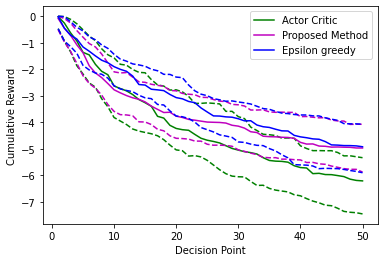

In [82]:
steps=np.arange(1,T+1)
plt.plot(steps,np.median(cumulated_reward_AC,axis=0),'g',label='Actor Critic')
plt.plot(steps,np.percentile(cumulated_reward_AC,25,axis=0),'g',linestyle='--')
plt.plot(steps,np.percentile(cumulated_reward_AC,75,axis=0),'g',linestyle='--')
plt.plot(steps,np.median(cumulated_reward_Prop,axis=0),'m',label='Proposed Method')
plt.plot(steps,np.percentile(cumulated_reward_Prop,25,axis=0),'m',linestyle='--')
plt.plot(steps,np.percentile(cumulated_reward_Prop,75,axis=0),'m',linestyle='--')
plt.plot(steps,np.median(cumulated_reward_epsilon,axis=0),'b',label='Epsilon greedy')
plt.plot(steps,np.percentile(cumulated_reward_epsilon,25,axis=0),'b',linestyle='--')
plt.plot(steps,np.percentile(cumulated_reward_epsilon,75,axis=0),'b',linestyle='--')

plt.xlabel('Decision Point')
plt.ylabel('Cumulative Reward')
plt.legend(loc='upper center', bbox_to_anchor=(0.8,1),ncol=1)
plt.savefig("reward_plot.pdf")
plt.show()

In [84]:
now=datetime.now().strftime('%Y.%m.%d(%Hh%Mm%Ss)')
os.mkdir(now)

np.save( now+"/cumulated_reward_AC.npy",cumulated_reward_AC)
np.save( now+"/cumulated_reward_Prop.npy",cumulated_reward_Prop)
np.save( now+"/cumulated_reward_epsilon.npy",cumulated_reward_epsilon)

np.save( now+"/theta_estimate_AC.npy",theta_estimate_AC )
np.save( now+"/theta_estimate_Prop.npy", theta_estimate_Prop )
np.save( now+"/mu_estimate_epsilon.npy", mu_estimate_epsilon)

np.save( now+"/variance_estimate_AC.npy", variance_estimate_AC )
np.save( now+"/variance_estimate_Prop.npy", variance_estimate_Prop )
np.save( now+"/variance_estimate_epsilon.npy", variance_estimate_epsilon )



In [85]:
# deciding value of epsilon

theta_mean_AC=np.mean(theta_estimate_AC,axis=0)
theta_mean_Prop=np.mean(theta_estimate_Prop,axis=0)

print(theta_mean_AC.dot(theta_mean_AC))
print(theta_mean_Prop.dot(theta_mean_Prop))

beta_lambda=theta_mean_Prop.dot(theta_mean_Prop)

epsilon=1/(1+np.exp(np.sqrt(beta_lambda)))

print(epsilon)

9.174306592448886
21.69433415167826
0.009398914633579709


In [86]:

H0_rejection_rate_AC={}
H0_rejection_rate_Prop={}
H0_rejection_rate_epsilon={}

for var in range(d):
    H0_rejection_rate_AC[var]=0
    H0_rejection_rate_Prop[var]=0
    H0_rejection_rate_epsilon[(int(var+1),0)]=0
    H0_rejection_rate_epsilon[(int(d+1+var),0)]=0 
    H0_rejection_rate_epsilon[(int(var+1),1)]=0
    H0_rejection_rate_epsilon[(int(d+1+var),1)]=0 

    for simul in range(100):
        Z=np.abs(theta_estimate_AC[simul][var]/np.sqrt(variance_estimate_AC[simul][var,var]))
        p_val=2*(1-stats.norm.cdf(Z))
        H0_rejection_rate_AC[var]+=int(p_val<0.05)
        Z=np.abs(theta_estimate_Prop[simul][var]/np.sqrt(variance_estimate_Prop[simul][var,var]))
        p_val=2*(1-stats.norm.cdf(Z))
        H0_rejection_rate_Prop[var]+=int(p_val<0.05)
        
        Z=np.abs(mu_estimate_epsilon[simul][0][var+1]/np.sqrt(variance_estimate_epsilon[simul][0][var+1,var+1]))
        p_val=2*(1-stats.norm.cdf(Z))
        H0_rejection_rate_epsilon[(int(var+1),0)]+=int(p_val<0.05)
        Z=np.abs(mu_estimate_epsilon[simul][1][var+1]/np.sqrt(variance_estimate_epsilon[simul][1][var+1,var+1]))
        p_val=2*(1-stats.norm.cdf(Z))
        H0_rejection_rate_epsilon[(int(var+1),1)]+=int(p_val<0.05)

        Z=np.abs(mu_estimate_epsilon[simul][0][d+var+1]/np.sqrt(variance_estimate_epsilon[simul][0][d+var+1,d+var+1]))
        p_val=2*(1-stats.norm.cdf(Z))
        H0_rejection_rate_epsilon[(int(d+var+1),0)]+=int(p_val<0.05)
        Z=np.abs(mu_estimate_epsilon[simul][1][d+var+1]/np.sqrt(variance_estimate_epsilon[simul][1][d+var+1,d+var+1]))
        p_val=2*(1-stats.norm.cdf(Z))
        H0_rejection_rate_epsilon[(int(d+var+1),1)]+=int(p_val<0.05)
        
    H0_rejection_rate_AC[var]/=100
    H0_rejection_rate_Prop[var]/=100
    H0_rejection_rate_epsilon[(int(var+1),0)]/=100
    H0_rejection_rate_epsilon[(int(var+1),1)]/=100
    H0_rejection_rate_epsilon[(int(d+1+var),0)]/=100
    H0_rejection_rate_epsilon[(int(d+1+var),1)]/=100


In [87]:
H0_rejection_rate_AC

{0: 0.77, 1: 0.64, 2: 0.74, 3: 0.07}

In [88]:
H0_rejection_rate_Prop

{0: 0.99, 1: 0.99, 2: 0.99, 3: 0.09}

In [97]:
H0_rejection_rate_epsilon

{(1, 0): 0.91,
 (5, 0): 0.93,
 (1, 1): 0.95,
 (5, 1): 0.93,
 (2, 0): 0.93,
 (6, 0): 0.89,
 (2, 1): 0.96,
 (6, 1): 0.94,
 (3, 0): 0.96,
 (7, 0): 0.96,
 (3, 1): 0.91,
 (7, 1): 0.9,
 (4, 0): 0.58,
 (8, 0): 0.65,
 (4, 1): 0.59,
 (8, 1): 0.59}